<a href="https://colab.research.google.com/github/kithmiGunawardna/Hate_Speech_detection/blob/master/Hate_Speech_Detection_imbalanced_dataset_classical_ML_approches_BOW(uni_gram).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
#import relevant libraraies
import pandas as pd
import numpy as np
from google.colab import drive
import re
import nltk
nltk.download('stopwords')
nltk.download('snowball_data')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package snowball_data to /root/nltk_data...
[nltk_data]   Package snowball_data is already up-to-date!


 0 - hate speech 1 - offensive language 2 - neither

In [2]:
#import dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Campus_Research/labeled_data.csv')

Mounted at /content/drive


In [ ]:
#df['tweet'] = df['tweet'].str.lower()  #convert tweets to lowerclass letters

In [ ]:
# # removing the users from the tweets
# import re
# import re

# # Assuming df['tweet'] is a Pandas Series
# df['tweet'] = df['tweet'].apply(lambda x: re.sub('@[^\s]+', '', str(x)))




In [3]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [ ]:
# import nltk

# from nltk.stem import PorterStemmer

# nltk.download('stopwords')

# from nltk.corpus import stopwords

In [ ]:
# stop_words = set(stopwords.words('english')) #to avoid similer ones we put thrm in to a set
# stemmer = PorterStemmer()

# def preprocess_text(text):
#     words = [stemmer.stem(word) for word in text.split() if not word.lower() in stop_words]
#     return ' '.join(words)

# df['processed_text'] = df['tweet'].apply(preprocess_text)

**Data Pre-processing**

In [ ]:
# pattern = r'[^\w\s]'
# df['processed_text'] =df['processed_text'].replace(pattern, '', regex=True)

In [4]:
stemmer = SnowballStemmer("english")
stopword = set(stopwords.words('english'))


def clean_text(text):
  """
  This function cleans text data by removing usernames, special characters, URLs, hashtags,
  lowercaseing text, removing stopwords, and applying stemming.

  Args:
      text: The text data to be cleaned.

  Returns:
      The cleaned text data.
  """

  # Remove usernames using regular expressions
  text = re.sub(r"@\w+", "", text)  # Username pattern

  # Lowercase text
  text = str(text).lower()

  # Remove special characters, URLs, hashtags
  text = re.sub(r"\[.*?\]|https?://\S+|www\.\S+|\s+#\S+", "", text)

  # Remove punctuation
  text = re.sub(r"[%s]" % re.escape(string.punctuation), "", text)

  # Remove newline characters
  text = re.sub("\n", "", text)

  # Remove words containing numbers (e.g., "RT123")
  text = re.sub(r"\w*\d\w*", "", text)

  # Split text into words after removing stopwords
  words = [word for word in text.split() if word not in stopword]

  # Apply stemming to each word
  stemmed_words = [stemmer.stem(word) for word in words]

  # Join stemmed words back into text
  cleaned_text = " ".join(stemmed_words)

  return cleaned_text




In [ ]:
# Apply clean_text function
df.loc[:, 'tweet'] = df['tweet'].apply(clean_text)

In [5]:
df

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...,...,...,...,...,...
24778,25291,3,0,2,1,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,25292,3,0,1,2,2,"you've gone and broke the wrong heart baby, an..."
24780,25294,3,0,3,0,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,25295,6,0,6,0,1,youu got wild bitches tellin you lies


In [6]:
df1 =df[['class', 'tweet']]
df1


,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...
...,...,...
24778,1,you's a muthaf***in lie &#8220;@LifeAsKing: @2...
24779,2,"you've gone and broke the wrong heart baby, an..."
24780,1,young buck wanna eat!!.. dat nigguh like I ain...
24781,1,youu got wild bitches tellin you lies


**Visualization**

<ipython-input-9-4c915c142a3a>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  for bar in sns.barplot(x=category, y=value_count, palette=bar_colors).patches:


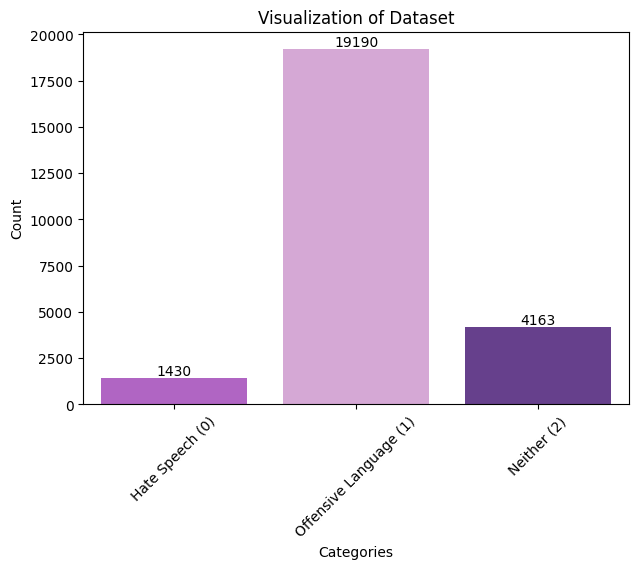

In [9]:
# Data
category = ['Hate Speech (0)', 'Offensive Language (1)', 'Neither (2)']
count = df['class'].value_counts()
value_count = [count[0], count[1], count[2]]

# Define a purple color palette for the bar plot
bar_colors = ['mediumorchid', 'plum', 'rebeccapurple']  # Purple shades

# Create a bar chart with Seaborn
# Customize the plot
plt.xlabel('Categories')
plt.ylabel('Count')
plt.title('Visualization of Dataset')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
for bar in sns.barplot(x=category, y=value_count, palette=bar_colors).patches:
  plt.annotate(int(bar.get_height()),
              (bar.get_x() + bar.get_width() / 2, bar.get_height()),
              ha='center', va='bottom')


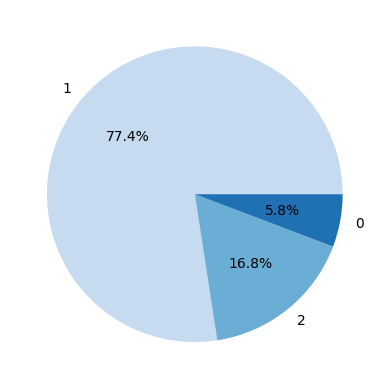

In [10]:
blue_palette = sns.color_palette("Blues", n_colors=3)  # Customize 'n_colors' based on the number of slices

# Create a pie chart with the blue color palette
plt.pie(
    df['class'].value_counts().values,  # Values for the pie chart
    labels=df['class'].value_counts().index,  # Labels for each slice
    autopct='%1.1f%%',  # Display the percentage with one decimal place
    colors=blue_palette  # Set the color palette to shades of blue
)

# Display the pie chart
plt.show()

In [ ]:
y = df['class']
x = df.tweet

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


***using bag of word uni gram method traing the models:***
     



In [ ]:
vectorizer = CountVectorizer()
x_train_vectorizer  = vectorizer.fit_transform(x_train)
vectorizer.get_feature_names_out()
x_test_vectorizer = vectorizer.transform(x_test)

***SVM model***

In [ ]:
clf = svm.SVC()
clf.fit(x_train_vectorizer,y_train)

SVC()

In [ ]:
SVM_output = clf.predict(x_test_vectorizer)

<Axes: >

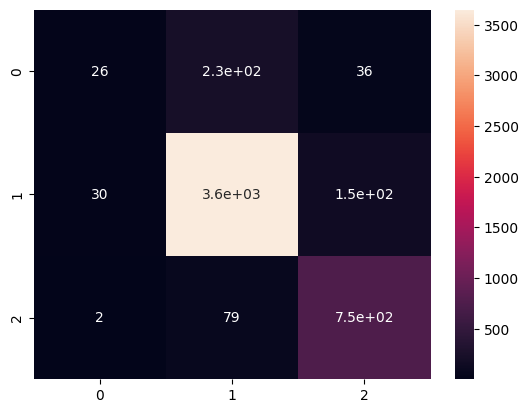

In [ ]:
y_true = y_test
y_pred = SVM_output
cm_for_SVM = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_SVM, annot=True)


In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.45      0.09      0.15       290
           1       0.92      0.95      0.94      3832
           2       0.80      0.90      0.85       835

    accuracy                           0.89      4957
   macro avg       0.72      0.65      0.64      4957
weighted avg       0.87      0.89      0.88      4957



***Logistic Regression model***  

In [ ]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train_vectorizer,y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [ ]:
logisticregresision_output = model.predict(x_test_vectorizer)


<Axes: >

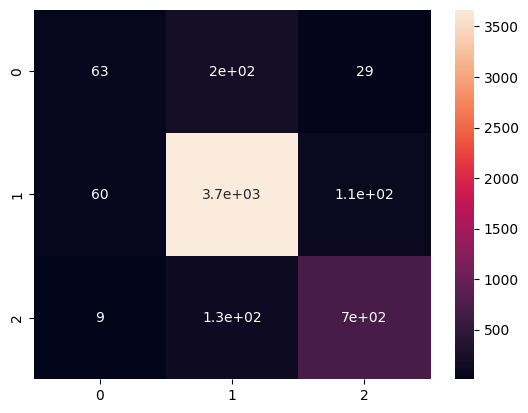

In [ ]:
y_true = y_test
y_pred = logisticregresision_output
cm_for_LogisticRegression = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_LogisticRegression, annot=True)


In [ ]:
print(classification_report(y_true, logisticregresision_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.48      0.22      0.30       290
           1       0.92      0.96      0.94      3832
           2       0.84      0.84      0.84       835

    accuracy                           0.89      4957
   macro avg       0.74      0.67      0.69      4957
weighted avg       0.88      0.89      0.88      4957



***Decision Tree Classifier***

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
clf.fit(x_train_vectorizer,y_train)


DecisionTreeClassifier(random_state=0)

In [ ]:
decision_tree_output = clf.predict(x_test_vectorizer)

<Axes: >

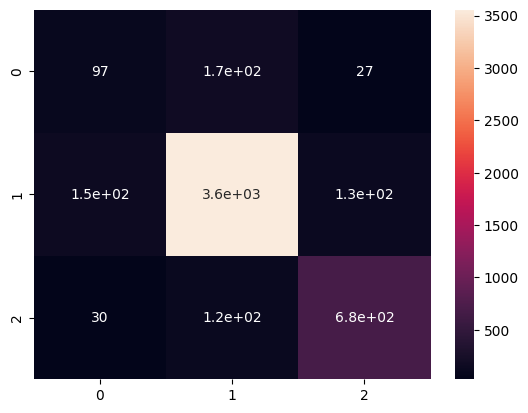

In [ ]:
y_true = y_test
y_pred =decision_tree_output
cm_for_decision_tree = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_decision_tree, annot=True)

In [ ]:
print(classification_report(y_true, y_pred ,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.35      0.33      0.34       290
           1       0.93      0.93      0.93      3832
           2       0.82      0.82      0.82       835

    accuracy                           0.88      4957
   macro avg       0.70      0.69      0.70      4957
weighted avg       0.87      0.88      0.87      4957



***passive Aggressive***

In [ ]:
clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
clf.fit(x_train_vectorizer,y_train)

PassiveAggressiveClassifier(random_state=0)

In [ ]:
passive_aggressive_output = clf.predict(x_test_vectorizer)

<Axes: >

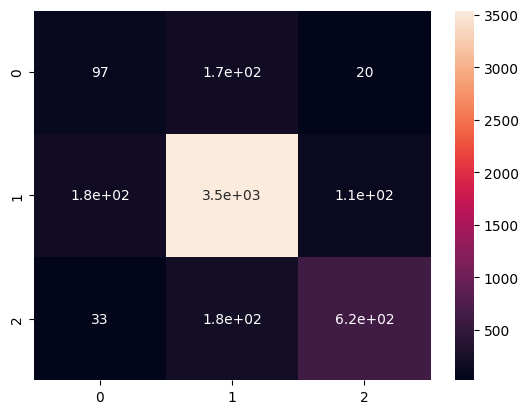

In [ ]:
y_true = y_test
y_pred = passive_aggressive_output
cm_for_passive_aggressive_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_passive_aggressive_output, annot=True)

In [ ]:
print(classification_report(y_true,passive_aggressive_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.31      0.33      0.32       290
           1       0.91      0.92      0.92      3832
           2       0.82      0.74      0.78       835

    accuracy                           0.86      4957
   macro avg       0.68      0.67      0.67      4957
weighted avg       0.86      0.86      0.86      4957



***Naive Bayes***

In [ ]:
clf = MultinomialNB()


# Fit the model using dense data
naive_bayes_output = clf.fit( x_train_vectorizer, y_train).predict(x_test_vectorizer)

<Axes: >

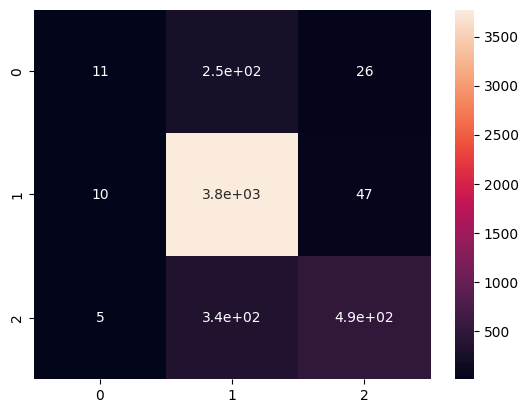

In [ ]:
y_true = y_test
y_pred = naive_bayes_output
cm_for_naive_bayes_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_naive_bayes_output, annot=True)

In [ ]:
print(classification_report(y_true,naive_bayes_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.42      0.04      0.07       290
           1       0.86      0.99      0.92      3832
           2       0.87      0.59      0.70       835

    accuracy                           0.86      4957
   macro avg       0.72      0.54      0.56      4957
weighted avg       0.84      0.86      0.83      4957



***KNN model***

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(x_train_vectorizer,y_train)


KNeighborsClassifier(n_neighbors=3)

In [ ]:
KNeighborsClassifier(...)

KNeighborsClassifier(n_neighbors=Ellipsis)

In [ ]:
KNN_output = neigh.predict(x_test_vectorizer)

<Axes: >

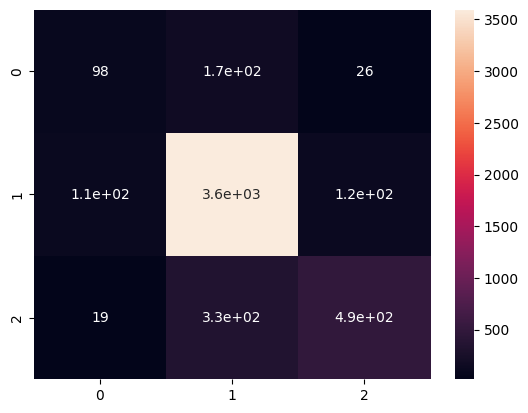

In [ ]:
y_true = y_test
y_pred = KNN_output
cm_for_KNN_output = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_KNN_output, annot=True)

In [ ]:
print(classification_report(y_true,KNN_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.43      0.34      0.38       290
           1       0.88      0.94      0.91      3832
           2       0.76      0.58      0.66       835

    accuracy                           0.84      4957
   macro avg       0.69      0.62      0.65      4957
weighted avg       0.83      0.84      0.84      4957



***Random Forest***

In [ ]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(x_train_vectorizer,y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [ ]:
Random_forest_output = clf.predict(x_test_vectorizer)

<Axes: >

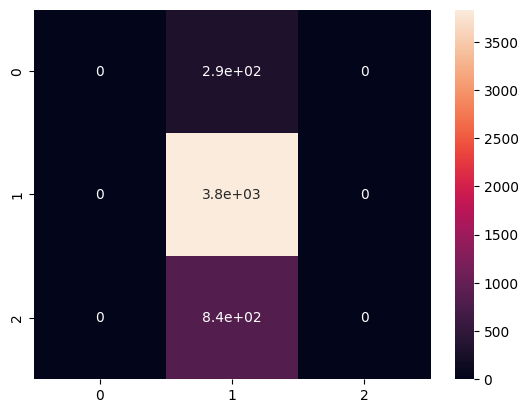

In [ ]:
y_true = y_test
y_pred =Random_forest_output
cm_for_Random_forest = confusion_matrix(y_true, y_pred)
sn.heatmap(data=cm_for_Random_forest, annot=True)

In [ ]:
print(classification_report(y_true,Random_forest_output,labels=[0,1,2]))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       290
           1       0.77      1.00      0.87      3832
           2       0.00      0.00      0.00       835

    accuracy                           0.77      4957
   macro avg       0.26      0.33      0.29      4957
weighted avg       0.60      0.77      0.67      4957



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
